# Playground Series Season 3 Episode 1: Solutions
## Tabular Regression with California Housing dataset.


## Prepared by Dwaipayan Mukherjee (Emp. id: 2211569, AIA-AIML)
## Prepared as part of 20 Kaggle Projects given by Mrityunjoy Pandey.

### Necessary Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [42]:
import lightgbm
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

### Loading the training data:

In [4]:
data = pd.read_csv("train.csv", index_col=0)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,,,,,,,,,
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [5]:
data.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,,,,,,,,,
37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592
37136,2.2419,34.0,5.424419,1.058685,1340.0,3.799065,36.34,-119.64,0.652


### Understanding the dataset:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37137 entries, 0 to 37136
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       37137 non-null  float64
 1   HouseAge     37137 non-null  float64
 2   AveRooms     37137 non-null  float64
 3   AveBedrms    37137 non-null  float64
 4   Population   37137 non-null  float64
 5   AveOccup     37137 non-null  float64
 6   Latitude     37137 non-null  float64
 7   Longitude    37137 non-null  float64
 8   MedHouseVal  37137 non-null  float64
dtypes: float64(9)
memory usage: 2.8 MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,37137.0,3.851029,1.803167,0.499900,2.602300,3.515600,4.699700,15.000100
HouseAge,37137.0,26.057005,12.158221,2.000000,17.000000,25.000000,35.000000,52.000000
AveRooms,37137.0,5.163124,1.206242,0.851064,4.357522,5.068611,5.858597,28.837607
AveBedrms,37137.0,1.062204,0.096490,0.500000,1.020305,1.054545,1.088825,5.873181
Population,37137.0,1660.778919,1302.469608,3.000000,952.000000,1383.000000,1856.000000,35682.000000
AveOccup,37137.0,2.831243,2.702413,0.950000,2.394495,2.744828,3.125313,502.990610
Latitude,37137.0,35.570030,2.083179,32.550000,33.930000,34.190000,37.700000,41.950000
Longitude,37137.0,-119.554329,1.974028,-124.350000,-121.800000,-118.450000,-118.020000,-114.550000
MedHouseVal,37137.0,2.079751,1.158571,0.149990,1.208000,1.808000,2.660000,5.000010


In [8]:
data.shape

(37137, 9)

In [10]:
data['HouseAge'].value_counts().sort_index()

2.0       78
3.0       71
4.0      400
5.0      550
6.0      363
7.0      387
8.0      362
9.0      377
10.0     590
11.0     607
12.0     502
13.0     775
14.0     994
15.0    1156
16.0    1390
17.0    1662
18.0    1059
19.0    1214
20.0    1069
21.0    1345
22.0    1133
23.0    1229
24.0    1073
25.0    1608
26.0    1479
27.0     874
28.0     887
29.0     746
30.0     832
31.0     535
32.0     627
33.0     820
34.0     926
35.0    1182
36.0    1129
37.0     761
38.0     479
39.0     458
40.0     309
41.0     239
42.0     429
43.0     506
44.0     373
45.0     388
46.0     376
47.0     200
48.0     185
49.0     148
50.0     158
51.0      29
52.0    2068
Name: HouseAge, dtype: int64

Text(0, 0.5, 'HouseAge')

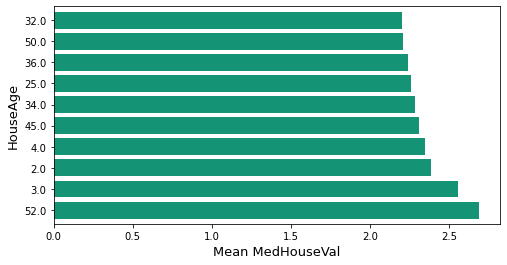

In [11]:
plt.figure(figsize=(8, 4))
data.groupby('HouseAge')['MedHouseVal'].mean().sort_values(ascending=False).head(10).plot(
    kind='barh',
    color='#159375',
    width=0.8
)
plt.xlabel('Mean MedHouseVal', fontsize=13)
plt.ylabel('HouseAge', fontsize=13)

The houses which are oldest and the ones that are recent have the highest Median value.

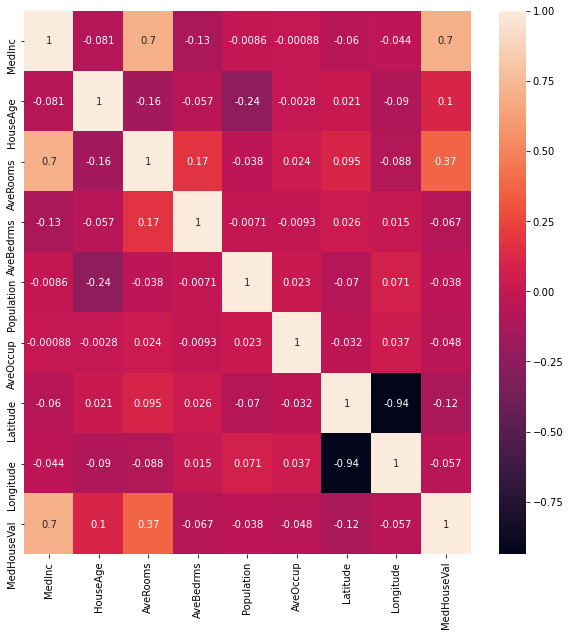

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

Text(0.5, 1.0, 'MedHouseVal --- HouseLocation')

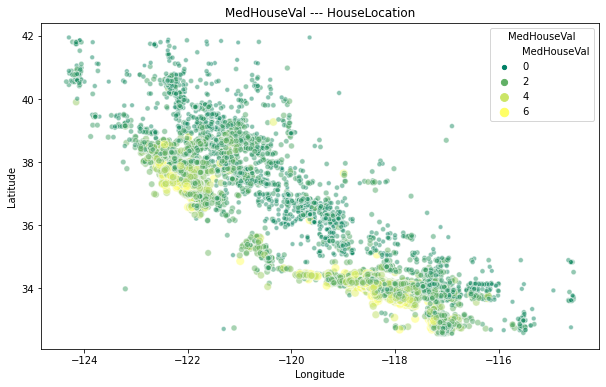

In [13]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=data,
    x='Longitude',
    y='Latitude',
    size='MedHouseVal',
    hue='MedHouseVal',
    palette='summer',
    alpha=0.5
)

plt.legend(title='MedHouseVal')
plt.title('MedHouseVal --- HouseLocation')

### Checking for missing values:

In [17]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### Scaling the `Population` variable:

The population variable is scaled as log(1 + population), as given below:

In [14]:
data['Population'] = np.log1p(data['Population'])

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,37137.0,3.851029,1.803167,0.499900,2.602300,3.515600,4.699700,15.000100
HouseAge,37137.0,26.057005,12.158221,2.000000,17.000000,25.000000,35.000000,52.000000
AveRooms,37137.0,5.163124,1.206242,0.851064,4.357522,5.068611,5.858597,28.837607
AveBedrms,37137.0,1.062204,0.096490,0.500000,1.020305,1.054545,1.088825,5.873181
Population,37137.0,7.226678,0.609851,1.386294,6.859615,7.232733,7.526718,10.482430
AveOccup,37137.0,2.831243,2.702413,0.950000,2.394495,2.744828,3.125313,502.990610
Latitude,37137.0,35.570030,2.083179,32.550000,33.930000,34.190000,37.700000,41.950000
Longitude,37137.0,-119.554329,1.974028,-124.350000,-121.800000,-118.450000,-118.020000,-114.550000
MedHouseVal,37137.0,2.079751,1.158571,0.149990,1.208000,1.808000,2.660000,5.000010


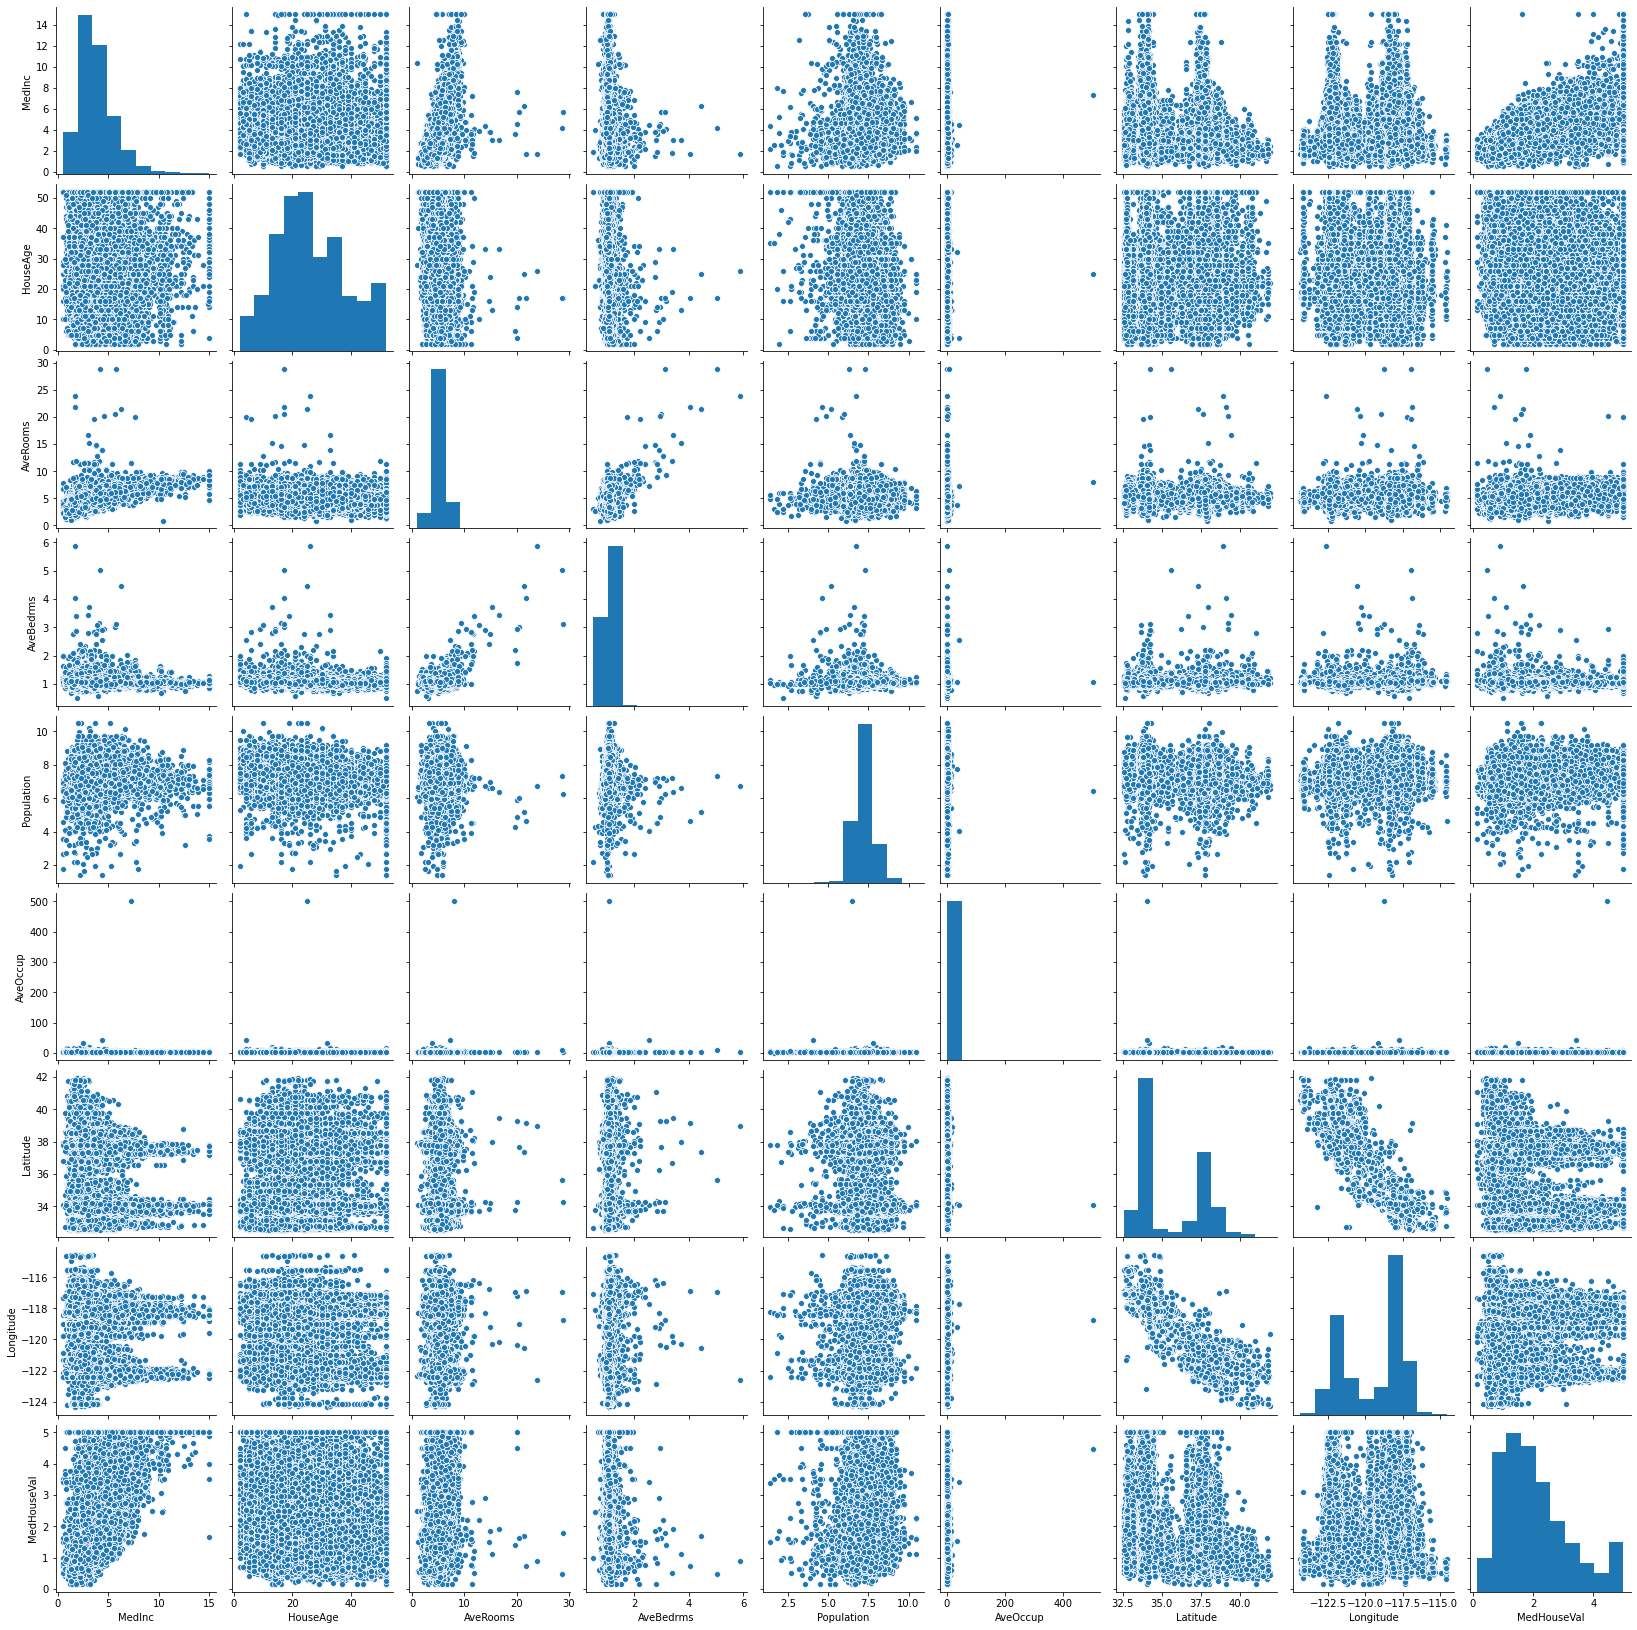

In [19]:
sns.pairplot(data)

First I try the simple Validation set approach, i.e., I divide the dataset into training and validation data:

In [21]:
X = data.drop(['MedHouseVal'], axis=1)
y = data['MedHouseVal']

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=1)

First we try the Ridge Regression with CV to find the optimal alpha:

In [27]:
alpha_vals = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
ridge_model = RidgeCV(alphas=alpha_vals)
ridge_model.fit(X_train, y_train)
print("Best alpha: ", ridge_model.alpha_)
y_pred_ridge = ridge_model.predict(X_val)
print("RMSE: ", np.sqrt(mean_squared_error(y_val, y_pred_ridge)))

Best alpha:  10000.0
RMSE:  0.7703743316950376


Next we try the Lasso Regression with CV:

In [28]:
alpha_vals = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
lasso_model = LassoCV(alphas=alpha_vals)
lasso_model.fit(X_train, y_train)
print("Best alpha: ", lasso_model.alpha_)
y_pred_lasso = lasso_model.predict(X_val)
print("RMSE: ", np.sqrt(mean_squared_error(y_val, y_pred_lasso)))

Best alpha:  0.1
RMSE:  0.8035063933652682


Now we try the same two regressions, with K-fold CV:

In [31]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
err = []

for i, (train_index, val_index) in enumerate(kf.split(data)):
    X_train, X_val = X.loc[train_index], X.loc[val_index]
    y_train, y_val = y.loc[train_index], y.loc[val_index]
    
    model = RidgeCV(alphas = alpha_vals)
    model.fit(X_train.values, y_train)
    
    preds = model.predict(X_val.values)
    
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    err.append(rmse)
    
    print(f'RMSE on fold {i+1}: {rmse}')
    print('-'*50)

print(f"Average RMSE: {np.mean(err)}")

RMSE on fold 1: 0.7899044977921059
--------------------------------------------------
RMSE on fold 2: 0.7564550319398962
--------------------------------------------------
RMSE on fold 3: 0.7593813342528594
--------------------------------------------------
RMSE on fold 4: 0.7508116690991762
--------------------------------------------------
RMSE on fold 5: 2.148955711723233
--------------------------------------------------
RMSE on fold 6: 0.7542042588774664
--------------------------------------------------
RMSE on fold 7: 0.7541050573529532
--------------------------------------------------
RMSE on fold 8: 0.7417027879179262
--------------------------------------------------
RMSE on fold 9: 0.759563993915205
--------------------------------------------------
RMSE on fold 10: 0.7381738878674312
--------------------------------------------------
Average RMSE: 0.8953258230738251


In [33]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
err = []

for i, (train_index, val_index) in enumerate(kf.split(data)):
    X_train, X_val = X.loc[train_index], X.loc[val_index]
    y_train, y_val = y.loc[train_index], y.loc[val_index]
    
    model = LassoCV(alphas = alpha_vals)
    model.fit(X_train.values, y_train)
    
    preds = model.predict(X_val.values)
    
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    err.append(rmse)
    print("Best alpha: ", model.alpha_)
    print(f'RMSE on fold {i+1}: {rmse}')
    print('-'*50)

print(f"Average RMSE: {np.mean(err)}")

Best alpha:  0.1
RMSE on fold 1: 0.828326632912536
--------------------------------------------------
Best alpha:  0.1
RMSE on fold 2: 0.7936943948499341
--------------------------------------------------
Best alpha:  0.1
RMSE on fold 3: 0.8010182639435618
--------------------------------------------------
Best alpha:  0.1
RMSE on fold 4: 0.7873155709091965
--------------------------------------------------
Best alpha:  0.0001
RMSE on fold 5: 2.1489328289022365
--------------------------------------------------
Best alpha:  0.1
RMSE on fold 6: 0.7940185503584303
--------------------------------------------------
Best alpha:  0.1
RMSE on fold 7: 0.7926451269059729
--------------------------------------------------
Best alpha:  0.1
RMSE on fold 8: 0.7798891288976761
--------------------------------------------------
Best alpha:  0.1
RMSE on fold 9: 0.799035375974568
--------------------------------------------------
Best alpha:  0.1
RMSE on fold 10: 0.7788121144425298
-------------------

Next, I try the Random Forest Regressor with a 10-fold cross validation:

In [35]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
err = []

for i, (train_index, val_index) in enumerate(kf.split(data)):
    X_train, X_val = X.loc[train_index], X.loc[val_index]
    y_train, y_val = y.loc[train_index], y.loc[val_index]
    
    model = RandomForestRegressor(n_estimators=1000, random_state=42)
    model.fit(X_train.values, y_train)
    
    preds = model.predict(X_val.values)
    
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    err.append(rmse)
    
    print(f'RMSE on fold {i+1}: {rmse}')
    print('-'*50)

print(f"Average RMSE: {np.mean(err)}")

RMSE on fold 1: 0.6139106866839388
--------------------------------------------------
RMSE on fold 2: 0.6051763047646487
--------------------------------------------------
RMSE on fold 3: 0.577663358311388
--------------------------------------------------
RMSE on fold 4: 0.5989714445180943
--------------------------------------------------
RMSE on fold 5: 0.5788086317695165
--------------------------------------------------
RMSE on fold 6: 0.6070566323217725
--------------------------------------------------
RMSE on fold 7: 0.5783584454434986
--------------------------------------------------
RMSE on fold 8: 0.5772069099500242
--------------------------------------------------
RMSE on fold 9: 0.6024283396479284
--------------------------------------------------
RMSE on fold 10: 0.5596126376461996
--------------------------------------------------
Average RMSE: 0.5899193391057009


Using the Random Forest Regressor (a bagging algorithm), our average RMSE is now 0.58, which is quite an improvement on the previous algorithms.

Now I will try some boosting methods, namely, AdaBoost, XGBoost and LightGBM.

First we try AdaBoost with a 10-fold CV:

In [37]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
err = []

for i, (train_index, val_index) in enumerate(kf.split(data)):
    X_train, X_val = X.loc[train_index], X.loc[val_index]
    y_train, y_val = y.loc[train_index], y.loc[val_index]
    
    base_model = DecisionTreeRegressor(max_depth=1)
    model = AdaBoostRegressor(base_estimator=base_model,
                             n_estimators= 1000,
                             learning_rate=0.01,
                             random_state=42)
    model.fit(X_train.values, y_train)
    
    preds = model.predict(X_val.values)
    
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    err.append(rmse)
    
    print(f'RMSE on fold {i+1}: {rmse}')
    print('-'*50)

print(f"Average RMSE: {np.mean(err)}")

RMSE on fold 1: 0.9703634297730986
--------------------------------------------------
RMSE on fold 2: 0.9361985559667892
--------------------------------------------------
RMSE on fold 3: 0.9361265454289976
--------------------------------------------------
RMSE on fold 4: 0.9365157658731943
--------------------------------------------------
RMSE on fold 5: 0.9460569642649286
--------------------------------------------------
RMSE on fold 6: 0.9597924530464866
--------------------------------------------------
RMSE on fold 7: 0.9387966832577981
--------------------------------------------------
RMSE on fold 8: 0.9401048909856974
--------------------------------------------------
RMSE on fold 9: 0.9554328496153165
--------------------------------------------------
RMSE on fold 10: 0.9458129619374217
--------------------------------------------------
Average RMSE: 0.9465201100149729


The AdaBoost model gave us a worse RMSE than the Random Forest model. Let us increase the number of estimators to 10000 and see the result:

In [38]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
err = []

for i, (train_index, val_index) in enumerate(kf.split(data)):
    X_train, X_val = X.loc[train_index], X.loc[val_index]
    y_train, y_val = y.loc[train_index], y.loc[val_index]
    
    base_model = DecisionTreeRegressor(max_depth=1)
    model = AdaBoostRegressor(base_estimator=base_model,
                             n_estimators= 10000,
                             learning_rate=0.01,
                             random_state=42)
    model.fit(X_train.values, y_train)
    
    preds = model.predict(X_val.values)
    
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    err.append(rmse)
    
    print(f'RMSE on fold {i+1}: {rmse}')
    print('-'*50)

print(f"Average RMSE: {np.mean(err)}")

RMSE on fold 1: 0.9708142216221012
--------------------------------------------------
RMSE on fold 2: 0.9412816437068707
--------------------------------------------------
RMSE on fold 3: 0.9361265454289976
--------------------------------------------------
RMSE on fold 4: 0.9422762126755568
--------------------------------------------------
RMSE on fold 5: 0.9503783153843905
--------------------------------------------------
RMSE on fold 6: 0.958597907260755
--------------------------------------------------
RMSE on fold 7: 0.9445902771344605
--------------------------------------------------
RMSE on fold 8: 0.9442264958998636
--------------------------------------------------
RMSE on fold 9: 0.9593343256817015
--------------------------------------------------
RMSE on fold 10: 0.9492406222630592
--------------------------------------------------
Average RMSE: 0.9496866567057756


The AdaBoost model performs really worse. Next I try the XGBoost algorithm:

In [40]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
err = []

for i, (train_index, val_index) in enumerate(kf.split(data)):
    X_train, X_val = X.loc[train_index], X.loc[val_index]
    y_train, y_val = y.loc[train_index], y.loc[val_index]
    
    
    model = XGBRegressor(n_estimators = 10000,
                        max_depth = 9,
                        learning_rate = 0.01,
                        colsample_bytree = 0.66,
                        subsample = 0.9,
                        random_state=42)
    model.fit(X_train.values,
              y_train,
              early_stopping_rounds=100,
              eval_set = [(X_val.values, y_val)],
              verbose = 1000)
    
    preds = model.predict(X_val.values)
    
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    err.append(rmse)
    
    print(f'RMSE on fold {i+1}: {rmse}')
    print('-'*50)

print(f"Average RMSE: {np.mean(err)}")

[0]	validation_0-rmse:1.96397


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.58739
[1878]	validation_0-rmse:0.58608
RMSE on fold 1: 0.5859938318603906
--------------------------------------------------
[0]	validation_0-rmse:1.94104


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.57899
[1600]	validation_0-rmse:0.57869
RMSE on fold 2: 0.5784702835461218
--------------------------------------------------
[0]	validation_0-rmse:1.95498


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.54117
[1261]	validation_0-rmse:0.54091
RMSE on fold 3: 0.5408227238377419
--------------------------------------------------
[0]	validation_0-rmse:1.94058


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.56345
[1418]	validation_0-rmse:0.56286
RMSE on fold 4: 0.5628273743151604
--------------------------------------------------
[0]	validation_0-rmse:1.94799


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.54788
[1218]	validation_0-rmse:0.54766
RMSE on fold 5: 0.5474795756692057
--------------------------------------------------
[0]	validation_0-rmse:1.92629


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[864]	validation_0-rmse:0.57589
RMSE on fold 6: 0.5758095712755816
--------------------------------------------------
[0]	validation_0-rmse:1.93851


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.54991
[1233]	validation_0-rmse:0.54956
RMSE on fold 7: 0.5494883296516367
--------------------------------------------------
[0]	validation_0-rmse:1.93445


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.54255
[1306]	validation_0-rmse:0.54255
RMSE on fold 8: 0.5422964265504752
--------------------------------------------------
[0]	validation_0-rmse:1.96334


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.57250
[1055]	validation_0-rmse:0.57251
RMSE on fold 9: 0.5724270819503077
--------------------------------------------------
[0]	validation_0-rmse:1.90665


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.52994
[1438]	validation_0-rmse:0.52905
RMSE on fold 10: 0.5290437016471874
--------------------------------------------------
Average RMSE: 0.5584658900303808


Here we get the Average RMSE to be 0.558, which is the smallest till now. Lets try the same model with a number of estimators increased to 20000 now:

In [41]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
err = []

for i, (train_index, val_index) in enumerate(kf.split(data)):
    X_train, X_val = X.loc[train_index], X.loc[val_index]
    y_train, y_val = y.loc[train_index], y.loc[val_index]
    
    
    model = XGBRegressor(n_estimators = 20000,
                        max_depth = 9,
                        learning_rate = 0.01,
                        colsample_bytree = 0.66,
                        subsample = 0.9,
                        random_state=42)
    model.fit(X_train.values,
              y_train,
              early_stopping_rounds=100,
              eval_set = [(X_val.values, y_val)],
              verbose = 1000)
    
    preds = model.predict(X_val.values)
    
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    err.append(rmse)
    
    print(f'RMSE on fold {i+1}: {rmse}')
    print('-'*50)

print(f"Average RMSE: {np.mean(err)}")

[0]	validation_0-rmse:1.96397


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.58739
[1878]	validation_0-rmse:0.58608
RMSE on fold 1: 0.5859938318603906
--------------------------------------------------
[0]	validation_0-rmse:1.94104


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.57899
[1599]	validation_0-rmse:0.57867
RMSE on fold 2: 0.5784702835461218
--------------------------------------------------
[0]	validation_0-rmse:1.95498


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.54117
[1260]	validation_0-rmse:0.54090
RMSE on fold 3: 0.5408227238377419
--------------------------------------------------
[0]	validation_0-rmse:1.94058


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.56345
[1419]	validation_0-rmse:0.56289
RMSE on fold 4: 0.5628273743151604
--------------------------------------------------
[0]	validation_0-rmse:1.94799


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.54788
[1219]	validation_0-rmse:0.54763
RMSE on fold 5: 0.5474795756692057
--------------------------------------------------
[0]	validation_0-rmse:1.92629


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[864]	validation_0-rmse:0.57589
RMSE on fold 6: 0.5758095712755816
--------------------------------------------------
[0]	validation_0-rmse:1.93851


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.54991
[1234]	validation_0-rmse:0.54956
RMSE on fold 7: 0.5494883296516367
--------------------------------------------------
[0]	validation_0-rmse:1.93445


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.54255
[1306]	validation_0-rmse:0.54255
RMSE on fold 8: 0.5422964265504752
--------------------------------------------------
[0]	validation_0-rmse:1.96334


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.57250
[1055]	validation_0-rmse:0.57251
RMSE on fold 9: 0.5724270819503077
--------------------------------------------------
[0]	validation_0-rmse:1.90665


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:0.52994
[1439]	validation_0-rmse:0.52906
RMSE on fold 10: 0.5290437016471874
--------------------------------------------------
Average RMSE: 0.5584658900303808


There is no change in the Average RMSE by increasing the number of estimators to 20000.

Next I try the LGBMRegressor:

In [43]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
err = []

for i, (train_index, val_index) in enumerate(kf.split(data)):
    X_train, X_val = X.loc[train_index], X.loc[val_index]
    y_train, y_val = y.loc[train_index], y.loc[val_index]
    
    
    model = LGBMRegressor(learning_rate=0.01,
                          max_depth=9,
                          num_leaves=90,
                          colsample_bytree=0.8,
                          subsample=0.9,
                          subsample_freq=5,
                          min_child_samples=36,
                          reg_lambda=28,
                          n_estimators=20000,
                          metric='rmse',
                          random_state=42)
    model.fit(X_train.values,
              y_train,
              early_stopping_rounds=100,
              eval_set = [(X_val.values, y_val)],
              callbacks=[lightgbm.early_stopping(100, verbose=True)])
    
    preds = model.predict(X_val.values)
    
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    err.append(rmse)
    
    print(f'RMSE on fold {i+1}: {rmse}')
    print('-'*50)

print(f"Average RMSE: {np.mean(err)}")

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1840]	valid_0's rmse: 0.585754
RMSE on fold 1: 0.5857539444456931
--------------------------------------------------
Training until validation scores don't improve for 100 rounds


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Early stopping, best iteration is:
[1470]	valid_0's rmse: 0.578336
RMSE on fold 2: 0.578335769314043
--------------------------------------------------
Training until validation scores don't improve for 100 rounds


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Early stopping, best iteration is:
[1377]	valid_0's rmse: 0.542838
RMSE on fold 3: 0.5428379263190448
--------------------------------------------------
Training until validation scores don't improve for 100 rounds


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Early stopping, best iteration is:
[1304]	valid_0's rmse: 0.562864
RMSE on fold 4: 0.5628638381060002
--------------------------------------------------
Training until validation scores don't improve for 100 rounds


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Early stopping, best iteration is:
[1262]	valid_0's rmse: 0.54752
RMSE on fold 5: 0.5475195398716564
--------------------------------------------------
Training until validation scores don't improve for 100 rounds


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Early stopping, best iteration is:
[1018]	valid_0's rmse: 0.577029
RMSE on fold 6: 0.5770290869109591
--------------------------------------------------
Training until validation scores don't improve for 100 rounds


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Early stopping, best iteration is:
[1306]	valid_0's rmse: 0.54979
RMSE on fold 7: 0.5497904538172897
--------------------------------------------------
Training until validation scores don't improve for 100 rounds


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Early stopping, best iteration is:
[1573]	valid_0's rmse: 0.545751
RMSE on fold 8: 0.5457510549855813
--------------------------------------------------
Training until validation scores don't improve for 100 rounds


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Early stopping, best iteration is:
[1660]	valid_0's rmse: 0.571127
RMSE on fold 9: 0.5711266199922206
--------------------------------------------------
Training until validation scores don't improve for 100 rounds


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Early stopping, best iteration is:
[1727]	valid_0's rmse: 0.526611
RMSE on fold 10: 0.526611106922553
--------------------------------------------------
Average RMSE: 0.5587619340685042


The Average RMSE is least for the XGBoost algorithm. So we select that as our best model for predicting the house prices.

In [44]:
## FINAL MODEL:
final_model = XGBRegressor(n_estimators = 20000,
                        max_depth = 9,
                        learning_rate = 0.01,
                        colsample_bytree = 0.66,
                        subsample = 0.9,
                        random_state=42)

In [45]:
final_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.66, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=20000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

Preparing the test data set:

In [47]:
test = pd.read_csv('test.csv', index_col=0)
test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
id,,,,,,,,
37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29


In [49]:
test['Population'] = np.log1p(test['Population'])

In [50]:
test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
id,,,,,,,,
37137,1.7062,35.0,4.966368,1.096539,7.184629,2.844411,39.75,-121.85
37138,1.3882,22.0,4.187035,1.098229,7.739359,3.180218,33.95,-118.29
37139,7.7197,21.0,7.129436,0.959276,7.336937,2.888889,33.61,-117.81
37140,4.6806,49.0,4.769697,1.048485,6.562444,1.743590,34.17,-118.34
37141,3.1284,25.0,3.765306,1.081633,8.458928,2.003827,34.17,-118.29


Prediction using our chosen XGBoost Regression model:

In [51]:
predictions = final_model.predict(test.values)

In [52]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

,id,MedHouseVal
0,37137,2.079751
1,37138,2.079751
2,37139,2.079751
3,37140,2.079751
4,37141,2.079751


In [53]:
submission['MedHouseVal'] = predictions

In [55]:
submission.to_csv('submission.csv', index=False)
submission.head(10)

,id,MedHouseVal
0,37137,0.639472
1,37138,0.976025
2,37139,3.947969
3,37140,3.021231
4,37141,2.384735
5,37142,3.133979
6,37143,1.320078
7,37144,1.922829
8,37145,0.885086
9,37146,0.773902
